<a href="https://colab.research.google.com/github/Niharika1552/Research-Project-/blob/master/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('listings.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,https://www.airbnb.com/rooms/3647,20190912153101,2019-09-13,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,NaN,NaN,NaN,Upon arrival please have a legibile copy of yo...,NaN,NaN,https://a0.muscache.com/im/pictures/838341/9b3...,NaN,4632,https://www.airbnb.com/users/show/4632,Elisabeth,2008-11-25,"New York, New York, United States",Make Up Artist National/ (Website hidden by Ai...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/4632/profile_...,https://a0.muscache.com/im/users/4632/profile_...,Harlem,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"New York, NY, United States",Harlem,Harlem,...,$20.00,3,7,3,3,7,7,3.0,7.0,37 months ago,t,30,60,90,365,2019-09-13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,https://www.airbnb.com/rooms/3831,20190912153101,2019-09-13,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,NaN,B52 bus for a 10-minute ride to downtown Brook...,You will have exclusive use of and access to: ...,"We'll be around, but since you have the top fl...",Smoking - outside please; pets allowed but ple...,NaN,NaN,https://a0.muscache.com/im/pictures/e49999c2-9...,NaN,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back bi-coastal actor/professor/attorney.,within an hour,92%,NaN,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn, NY, United States",Brooklyn,Clinton Hill,...,$0.00,1,730,1,1,730,730,1.0,730.0,3 days ago,t,1,3,8,192,2019-09-13,279,67,2014-09-30,2019-08-29,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,NaN,NaN,f,f,moderate,f,f,1,1,0,0,4.62
2,5022,https://www.airbnb.com/rooms/5022,20190912153101,2019-09-13,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,NaN,NaN,NaN,NaN,Please be considerate when staying in the apar...,NaN,NaN,https://a0.muscache.com/im/pictures/feb453bd-f...,NaN,7192,https://www.airbnb.com/users/show/7192,Laura,2009-01-29,"Miami, Florida, United States",I have been a NYer for almost 10 years. I came...,NaN,NaN,NaN,f,https:/

In [0]:
list1= list(df.dtypes)

In [0]:
list2=list(df.columns)

In [0]:
a=zip(list2,list1)

In [7]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [8]:
for col,types in a:
  print(col,types)

id int64
listing_url object
scrape_id int64
last_scraped object
name object
summary object
space object
description object
experiences_offered object
neighborhood_overview object
notes object
transit object
access object
interaction object
house_rules object
thumbnail_url float64
medium_url float64
picture_url object
xl_picture_url float64
host_id int64
host_url object
host_name object
host_since object
host_location object
host_about object
host_response_time object
host_response_rate object
host_acceptance_rate float64
host_is_superhost object
host_thumbnail_url object
host_picture_url object
host_neighbourhood object
host_listings_count float64
host_total_listings_count float64
host_verifications object
host_has_profile_pic object
host_identity_verified object
street object
neighbourhood object
neighbourhood_cleansed object
neighbourhood_group_cleansed object
city object
state object
zipcode object
market object
smart_location object
country_code object
country object
latitude float

In [0]:
required_col= ['host_id','zipcode','property_type','room_type','city','state','accommodates','bedrooms','beds','bed_type','price','number_of_reviews',
'review_scores_rating','host_listings_count','availability_30','minimum_nights','latitude','longitude','bathrooms']


In [0]:
df1=df[required_col]

In [11]:
df1.head()

,host_id,zipcode,property_type,room_type,city,state,accommodates,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,host_listings_count,availability_30,minimum_nights,latitude,longitude,bathrooms
0,4632,10027,Apartment,Private room,New York,NY,2,1.0,1.0,Pull-out Sofa,$150.00,0,NaN,1.0,30,3,40.80902,-73.94190,1.0
1,4869,11238,Guest suite,Entire home/apt,Brooklyn,NY,3,1.0,4.0,Real Bed,$89.00,279,90.0,1.0,1,1,40.68514,-73.95976,1.0
2,7192,10029,Apartment,Entire home/apt,New York,NY,1,NaN,1.0,Real Bed,$80.00,9,93.0,1.0,0,10,40.79851,-73.94399,1.0
3,7322,10016,Apartment,Entire home/apt,New York,NY,2,1.0,1.0,Real Bed,$200.00,75,89.0,1.0,3,3,40.74767,-73.97500,1.0
4,7356,11216,Apartment,Private room,Brooklyn,NY,2,1.0,1.0,Futon,$60.00,49,90.0,1.0,0,45,40.68688,-73.95596,NaN


In [25]:
df1['price'] = df1['price'].replace('[\$,)]','', regex=True).astype('float')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df1.head()

,host_id,zipcode,property_type,room_type,city,state,accommodates,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,host_listings_count,availability_30,minimum_nights,latitude,longitude,bathrooms
0,4632,10027,Apartment,Private room,New York,NY,2,1.0,1.0,Pull-out Sofa,150.0,0,NaN,1.0,30,3,40.80902,-73.94190,1.0
1,4869,11238,Guest suite,Entire home/apt,Brooklyn,NY,3,1.0,4.0,Real Bed,89.0,279,90.0,1.0,1,1,40.68514,-73.95976,1.0
2,7192,10029,Apartment,Entire home/apt,New York,NY,1,NaN,1.0,Real Bed,80.0,9,93.0,1.0,0,10,40.79851,-73.94399,1.0
3,7322,10016,Apartment,Entire home/apt,New York,NY,2,1.0,1.0,Real Bed,200.0,75,89.0,1.0,3,3,40.74767,-73.97500,1.0
4,7356,11216,Apartment,Private room,Brooklyn,NY,2,1.0,1.0,Futon,60.0,49,90.0,1.0,0,45,40.68688,-73.95596,NaN


In [0]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [0]:
df_test=df1[['host_id','zipcode','accommodates','bedrooms','beds','price','number_of_reviews',
'review_scores_rating','host_listings_count','availability_30','minimum_nights','latitude','longitude','bathrooms']]

In [31]:
x=df_test
X = df_test.drop("price",1)   #Feature Matrix
y = df_test["price"]          #Target Variable
df_test.head()


,host_id,zipcode,accommodates,bedrooms,beds,price,number_of_reviews,review_scores_rating,host_listings_count,availability_30,minimum_nights,latitude,longitude,bathrooms
0,4632,10027,2,1.0,1.0,150.0,0,NaN,1.0,30,3,40.80902,-73.94190,1.0
1,4869,11238,3,1.0,4.0,89.0,279,90.0,1.0,1,1,40.68514,-73.95976,1.0
2,7192,10029,1,NaN,1.0,80.0,9,93.0,1.0,0,10,40.79851,-73.94399,1.0
3,7322,10016,2,1.0,1.0,200.0,75,89.0,1.0,3,3,40.74767,-73.97500,1.0
4,7356,11216,2,1.0,1.0,60.0,49,90.0,1.0,0,45,40.68688,-73.95596,NaN


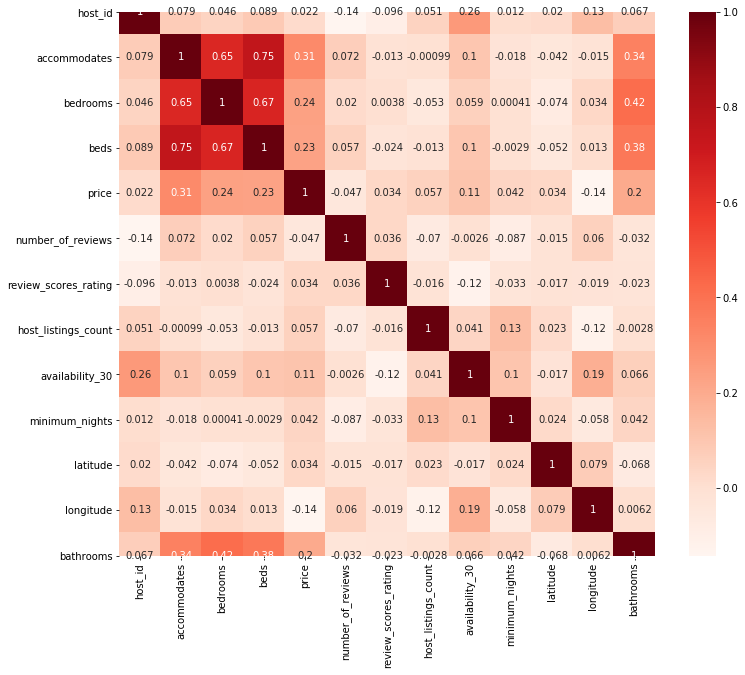

In [32]:
plt.figure(figsize=(12,10))
cor = df_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [34]:
cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

accommodates    0.313959
bedrooms        0.235630
beds            0.230847
price           1.000000
bathrooms       0.203075
Name: price, dtype: float64

In [0]:
df1["city"]=df1["city"].str.lower()

In [0]:
df1["city"].head()

0    new york
1    brooklyn
2    new york
3    new york
4    brooklyn
Name: city, dtype: object

In [0]:
df1.property_type.unique()

array(['Apartment', 'Guest suite', 'Townhouse', 'Loft',
       'Bed and breakfast', 'Condominium', 'House', 'Boutique hotel',
       'Tiny house', 'Guesthouse', 'Cabin', 'Hostel', 'Other', 'Resort',
       'Serviced apartment', 'Boat', 'Hotel', 'Aparthotel', 'Earth house',
       'Bungalow', 'Cottage', 'Villa', 'Cave', 'Houseboat', 'Castle',
       'Nature lodge', 'Tent', 'Camper/RV', 'Bus', 'Dome house',
       'Farm stay', 'Casa particular (Cuba)', 'Island', 'Yurt', 'Barn',
       'Timeshare'], dtype=object)

# Handling Missing values

In [0]:
for i in df1.columns:
    print (i + ', Missing values count:', len(df1[i][df1[i].isnull()]))

host_id, Missing values count: 0
zipcode, Missing values count: 471
property_type, Missing values count: 0
room_type, Missing values count: 0
city, Missing values count: 68
state, Missing values count: 3
accommodates, Missing values count: 0
bedrooms, Missing values count: 41
beds, Missing values count: 36
bed_type, Missing values count: 0
price, Missing values count: 0
number_of_reviews, Missing values count: 0
review_scores_rating, Missing values count: 10561
host_listings_count, Missing values count: 21
availability_30, Missing values count: 0
minimum_nights, Missing values count: 0
latitude, Missing values count: 0
longitude, Missing values count: 0
bathrooms, Missing values count: 48


In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48377 entries, 0 to 48376
Data columns (total 19 columns):
host_id                 48377 non-null int64
zipcode                 47906 non-null object
property_type           48377 non-null object
room_type               48377 non-null object
city                    48309 non-null object
state                   48374 non-null object
accommodates            48377 non-null int64
bedrooms                48336 non-null float64
beds                    48341 non-null float64
bed_type                48377 non-null object
price                   48377 non-null object
number_of_reviews       48377 non-null int64
review_scores_rating    37816 non-null float64
host_listings_count     48356 non-null float64
availability_30         48377 non-null int64
minimum_nights          48377 non-null int64
latitude                48377 non-null float64
longitude               48377 non-null float64
bathrooms               48329 non-null float64
dtypes: float64

In [0]:
df1 = df1.replace('_', np.nan)

In [0]:
df1.isnull().sum()

host_id                     0
zipcode                   471
property_type               0
room_type                   0
city                       68
state                       3
accommodates                0
bedrooms                   41
beds                       36
bed_type                    0
price                       0
number_of_reviews           0
review_scores_rating    10561
host_listings_count        21
availability_30             0
minimum_nights              0
latitude                    0
longitude                   0
bathrooms                  48
dtype: int64

In [0]:
missing_val=[]
for col in df1.columns:
  msng_val_cnt=len(df1[col][df1[col].isnull()])
  tot_len=len(df1[col])
  dict1={'Col_Name':col,'DataType':df1[column].dtype,'percentofNull': msng_val_cnt*100.0/tot_len}
  missing_val.append(dict1)

missing_col_df = pd.DataFrame(missing_val, columns=['Col_Name','DataType','percentofNull']).sort_values( by='percentofNull',ascending=False)





In [55]:
wanted_col_df=missing_col_df[missing_col_df.percentofNull<50.0]
wanted_col_df

,Col_Name,DataType,percentofNull
12,review_scores_rating,float64,21.830622
1,zipcode,float64,0.973603
4,city,float64,0.140563
18,bathrooms,float64,0.099221
7,bedrooms,float64,0.084751
8,beds,float64,0.074416
13,host_listings_count,float64,0.043409
5,state,float64,0.006201
17,longitude,float64,0.000000
16,latitude,float64,0.000000


In [56]:
for column in df1.columns.values:
    if (np.any(wanted_col_df.Col_Name.values == column) == False):
        df1.drop(column, axis=1, inplace=True)
        
df1.head(5)

,host_id,zipcode,property_type,room_type,city,state,accommodates,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,host_listings_count,availability_30,minimum_nights,latitude,longitude,bathrooms
0,4632,10027,Apartment,Private room,New York,NY,2,1.0,1.0,Pull-out Sofa,150.0,0,NaN,1.0,30,3,40.80902,-73.94190,1.0
1,4869,11238,Guest suite,Entire home/apt,Brooklyn,NY,3,1.0,4.0,Real Bed,89.0,279,90.0,1.0,1,1,40.68514,-73.95976,1.0
2,7192,10029,Apartment,Entire home/apt,New York,NY,1,NaN,1.0,Real Bed,80.0,9,93.0,1.0,0,10,40.79851,-73.94399,1.0
3,7322,10016,Apartment,Entire home/apt,New York,NY,2,1.0,1.0,Real Bed,200.0,75,89.0,1.0,3,3,40.74767,-73.97500,1.0
4,7356,11216,Apartment,Private room,Brooklyn,NY,2,1.0,1.0,Futon,60.0,49,90.0,1.0,0,45,40.68688,-73.95596,NaN


In [57]:
df1.columns

Index(['host_id', 'zipcode', 'property_type', 'room_type', 'city', 'state',
       'accommodates', 'bedrooms', 'beds', 'bed_type', 'price',
       'number_of_reviews', 'review_scores_rating', 'host_listings_count',
       'availability_30', 'minimum_nights', 'latitude', 'longitude',
       'bathrooms'],
      dtype='object')

#Imputing Missing Values

In [46]:
wanted_col_df.dtypes == 'float64'

Col_Name         False
percentofNull     True
dtype: bool